In [1]:
# To make figures and animations for the presentation.

import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from phase_response import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



100%|██████████| 199999/199999 [00:02<00:00, 75445.67it/s]


<Figure size 640x480 with 0 Axes>

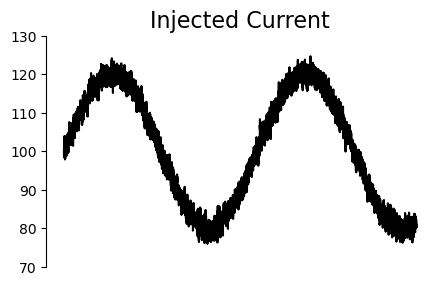

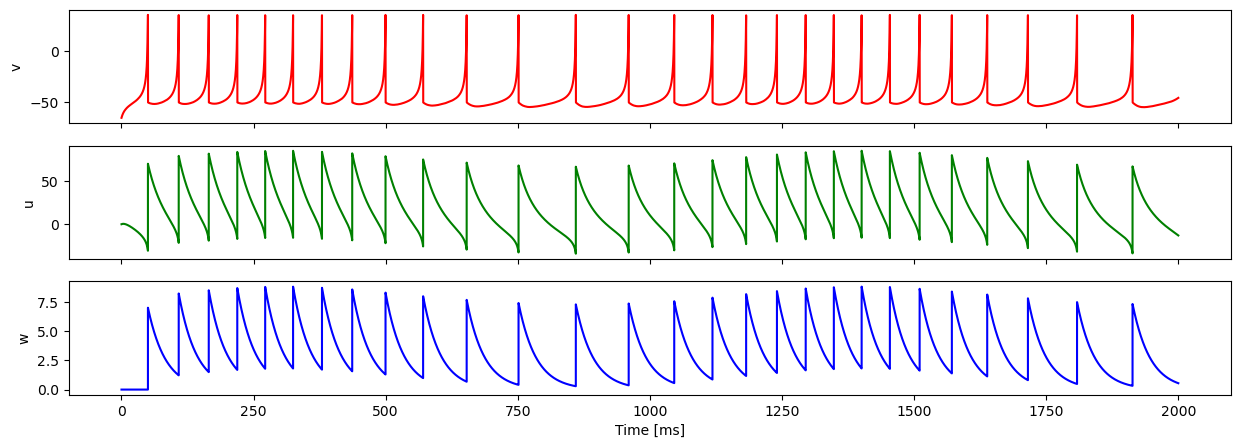

In [2]:
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': 7.0, 'tau': 0.5}  

FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0}  


x_start = np.array([-65, 0, 0])
t_start = 0.


neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)

T = 2000
dt = 0.01
N_iter = int(T/dt)

y_0 = 100
A = 20
f = 1e-6*(180/np.pi)
mu = A*np.sin(f*np.arange(N_iter)) + y_0
I_inj = OU_current(N_iter, dt, y_0 = 100, theta = 1, mu = mu, sigma = 2.0)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

sns.despine()

# make figure of injected current
fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.plot(T_RS, I_inj, c = 'black')
ax.set_ylim((70, 130))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_title("Injected Current", fontsize = 16)
plt.savefig(f".\\injected_current.png")
plt.show()

fig, ax = plot_membrane_variables(X_RS, T_RS)
plt.savefig(".\\membrane_variables.png")

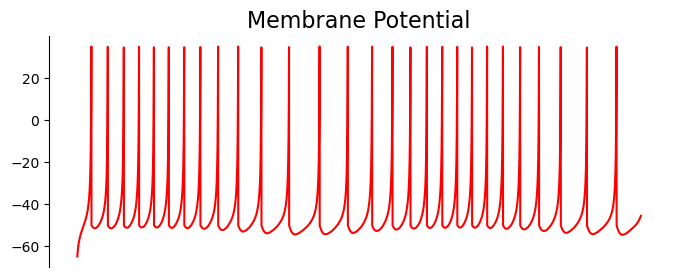

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
ax.plot(T_RS, X_RS[0, :], c = 'red')
#ax.set_ylim((70, 130))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_title("Membrane Potential", fontsize = 16)
plt.savefig(f".\\membrane_potential.png")
plt.show()

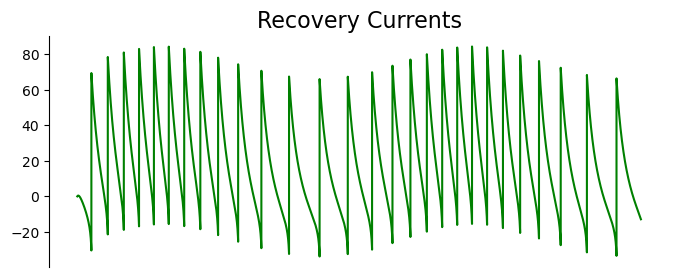

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
ax.plot(T_RS, X_RS[1, :], c = 'green')
#ax.set_ylim((70, 130))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_title("Recovery Currents", fontsize = 16)
plt.savefig(f".\\recovery_variable.png")
plt.show()

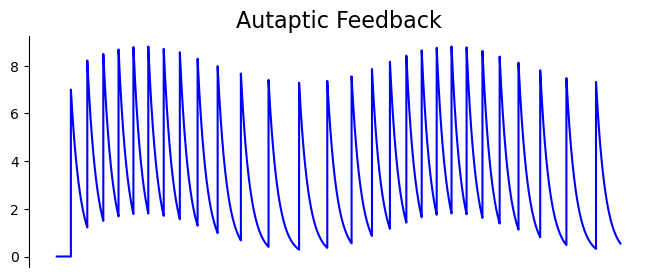

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
ax.plot(T_RS, X_RS[2, :], c = 'blue')
#ax.set_ylim((70, 130))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_title("Autaptic Feedback", fontsize = 16)
plt.savefig(f".\\autapse_variable.png")
plt.show()

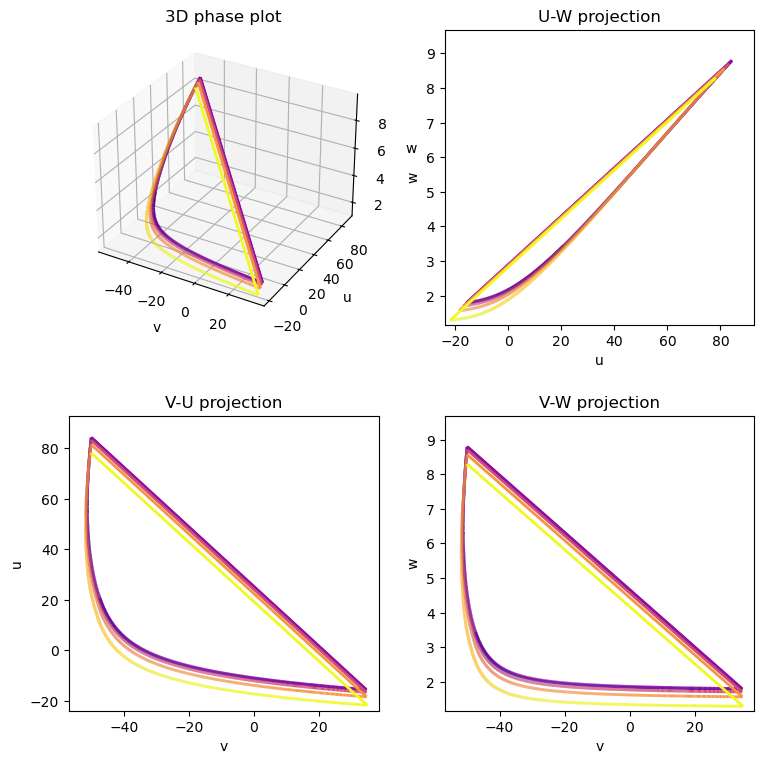

In [6]:
#def func(I, split):
split = range(int(250/dt), int(500/dt))
fig = plot_3D_gradient(X_RS, split)

In [53]:
# Run RS neuron. No input, just different starting positions.
x_start = np.array([[-65, 0, 0],
                   [-50, 40, 0],
                   [-40, -70, 0],
                   [-62, 80, 0]])
t_start = 0.


T = 2000
dt = 0.01
N_iter = int(T/dt)


neuron_RS = AQUA(RS)
I_inj = np.zeros(N_iter)
X = np.zeros((4, 3, N_iter)) # store trajectories
for i, start in enumerate(x_start):
    neuron_RS.Initialise(x_start[i], t_start)
    X[i, :], T, _ = neuron_RS.update_RK2(dt, N_iter, I_inj)



100%|██████████| 199999/199999 [00:02<00:00, 80540.07it/s]


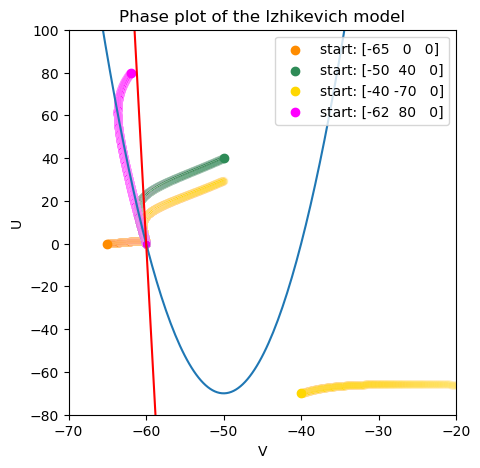

In [73]:
## plot v- and u-nullclines. Then include some trajectories...

v = np.linspace(-80, 40, 400)
u = np.linspace(-15, 0, 100)

v_null = RS["k"] * (v - RS["v_r"]) * (v - RS["v_t"])
u_null = (RS["b"]/RS["a"]) * (v - RS["v_r"])

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.lineplot(x = v, y = v_null, ax = ax)
sns.lineplot(x = v, y = u_null, ax = ax, color = 'red')

t_end = 50000
colors = ["darkorange", "seagreen", "gold", "fuchsia"]
for i in range(4):
    sns.scatterplot(x = X[i, 0, :t_end], y = X[i, 1, :t_end], ax = ax, color = colors[i], alpha = 0.05)
    ax.scatter(x = X[i, 0, 0], y = X[i, 1, 0], color = colors[i], label = f"start: {x_start[i]}")

ax.set(xlim = (-70, -20), ylim = (-80, 100), xlabel = "V", ylabel = "U")
plt.title("Phase plot of the Izhikevich model")
plt.legend()
plt.savefig(".\\phase_plot.png")
plt.show()